<h1 style="color:red" align="center">Neural Networks: The basics made for all</h1>
<p align="center">By Bastien Lhopitallier and Robin Sobczyk</p>

<h2 align="center"> Overall summary </h2>

To follow this course, it is assumed that you have:
- a comprehension of basic mathematics (derivatives, compositions, gradients, usual functions, linear algebra)
- a computer on which you can run Python
- a comprehension of Python codes and the ability to code in Python

To get started, ensure that you have:
- Python in version 3.9, 3.10 or 3.11 (later versions have not been tested)
- run `pip install -r ./requirements.txt` (potentially in a virtual environment if needed)

After this series of courses, you will know:
- what is an artificial neuron and how it is linked to biological neurons
- what is a neural network
- the main different types of neural networks
- how training is done for neural networks, and what are the different options for training
- how to code a neural network from scratch
- how to code your first neural network with PyTorch and train it
- how to create and read a computation flow of a neural network
- how to debug your neural network through gradient inspection
- what are the risks and limits of neural networks
- how to run basic analysis of the activations with heatmaps
- the ethical concerns raised by deep learning

The last course is here to deepen your knowledge and is more of a gallery of usual things and directions to dig rather than a course in itself.

<h2 style="color:green" align="center">Course 0: Introduction</h2>

In this course, you will learn:
- what is an artificial neuron and how it is linked to biological neurons
- how to assemble artificial neurons, what is an artificial neural network
- the different types of networks and their use case in a quick overview

<h3 style="color:skyblue">From biological to artificial neurons</h3>

Neurons are the core cells to our brains and nervous system. They are responsible for the information processing in our body, should it be through thoughts or reflexes.

<div style="max-width:800px;margin-right: auto; margin-left: auto;">

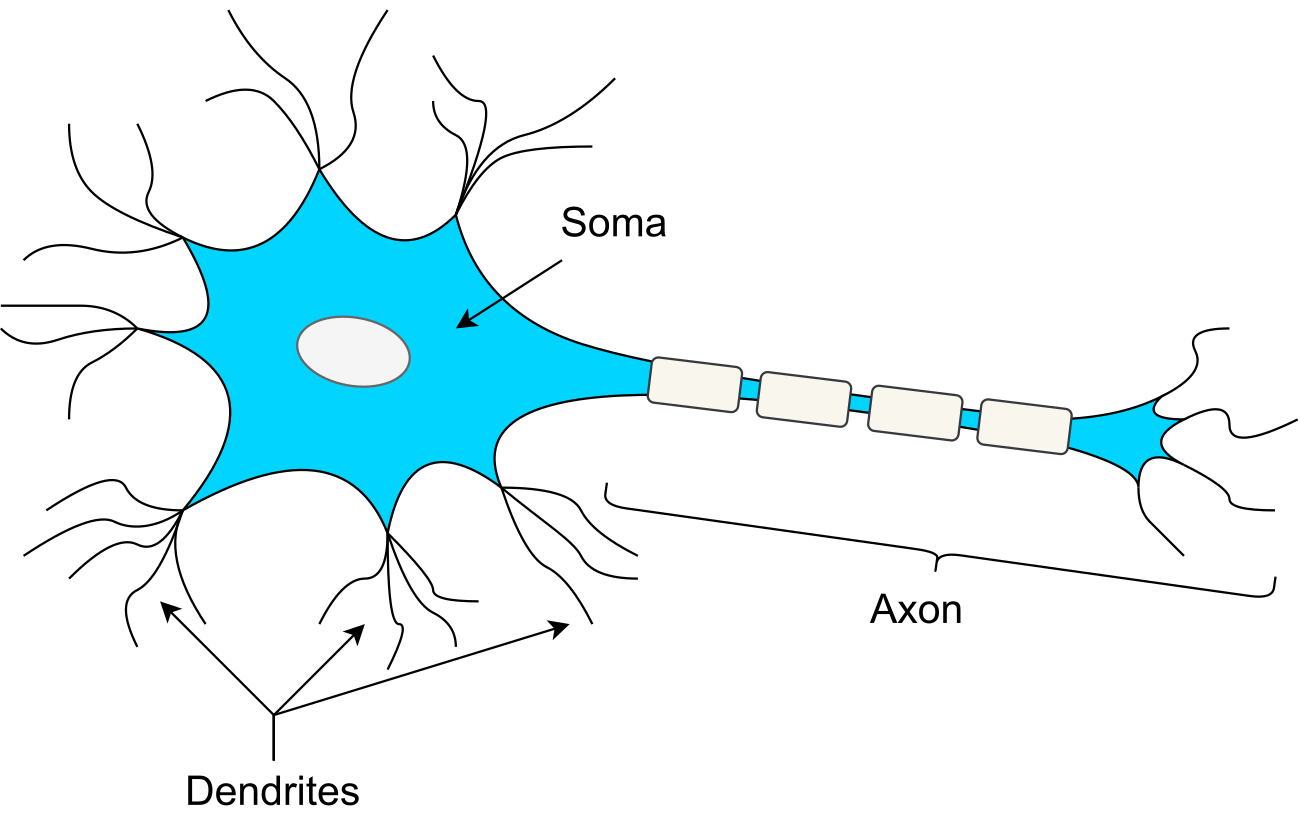

</div>

They are composed of three main parts:
- the body, which is called the *soma*, and contains the nucleus
- the *axon*, which is the main branch of the cell
- *dendrites*, which are the other branches

In a very very (very!) simplified way, dendrites are in charge of receiving information, the soma gathers the informations from the dendrites and processes them, and the axon is meant to propagate the processed information. A connection between two neurons is called a *synapse*, and there are two types of synapses:
- *inhibitory*, if the message sent should prevent the receiving neuron from firing an information
- *excitatory*, if the message sent should encourage the receiving neuron to transmit information

In an effort to provide a theoretic framework to study neural activity, [McCulloch and Pitts](https://doi.org/10.1007/BF02478259) introduced the first model of artificial neurons in 1943. Mainly, this model can be represented as follow:

<div style="max-width:400px;margin-right: auto; margin-left: auto;">

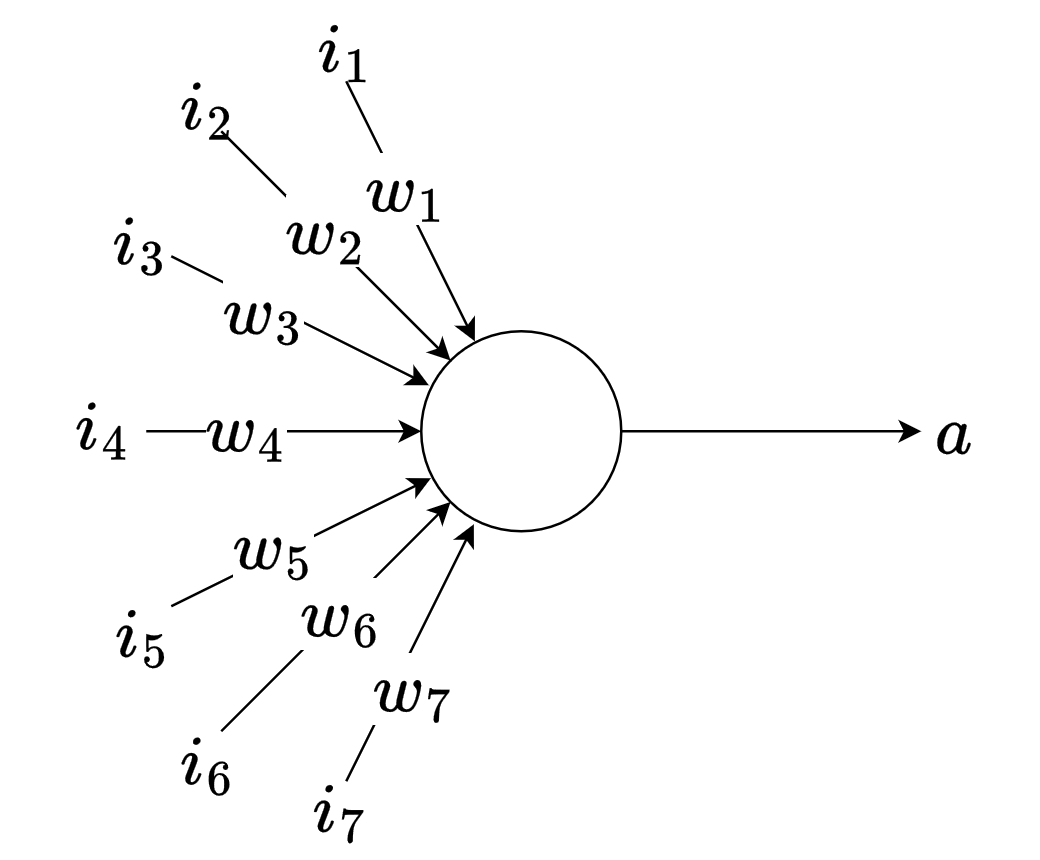

</div>

In this picture, the soma is the circle at the middle, the axon is the output on the right, and the dendrites are the inputs on the left. Weights are added on the dendrites to take into account biological effects like synapse sensitivity or synapse type.

At first, the signals in this model were planned to be binary, because biological neurons are either firing or staying silent. Still with simplifications, biological neurons fire if the sum of the received (weighted) signals is over a threshold, that we will denote $\theta$.

Hence, the formula for the activity of a neuron is $$a=\left\lbrace\begin{matrix}1 & \textnormal{if }\sum\limits_{j=1}^n w_ji_j \geq \theta\\ 0 & \textnormal{otherwise}\end{matrix}\right.$$

In order to simplify this equation, let $W=\begin{pmatrix}w_1\\\vdots\\ w_n\end{pmatrix}$, $I=\begin{pmatrix}i_1\\\vdots\\ i_n\end{pmatrix}$ and $\textnormal{thresh}_\theta: x\mapsto\left\lbrace\begin{matrix}1 & \textnormal{if }x \geq \theta\\ 0 & \textnormal{otherwise}\end{matrix}\right.$  
then we have
$$a=\textnormal{thresh}_\theta(W^\top I)$$
This can be further simplified by noticing that $\textnormal{thresh}_\theta(x)=\textnormal{thresh}_0(x-\theta)$. $\textnormal{thresh}_0$ is also known as the Heaviside step function, and denoted by $H$. We finally have
$$a=H(W^\top I-\theta)$$

<h3 style="color:skyblue">Assembling neurons together</h3>

Assembling neurons is quite simple, it is done the same way as in the brain: we connect dendrites to axons.

<div style="max-width:500px;margin-right: auto; margin-left: auto;">

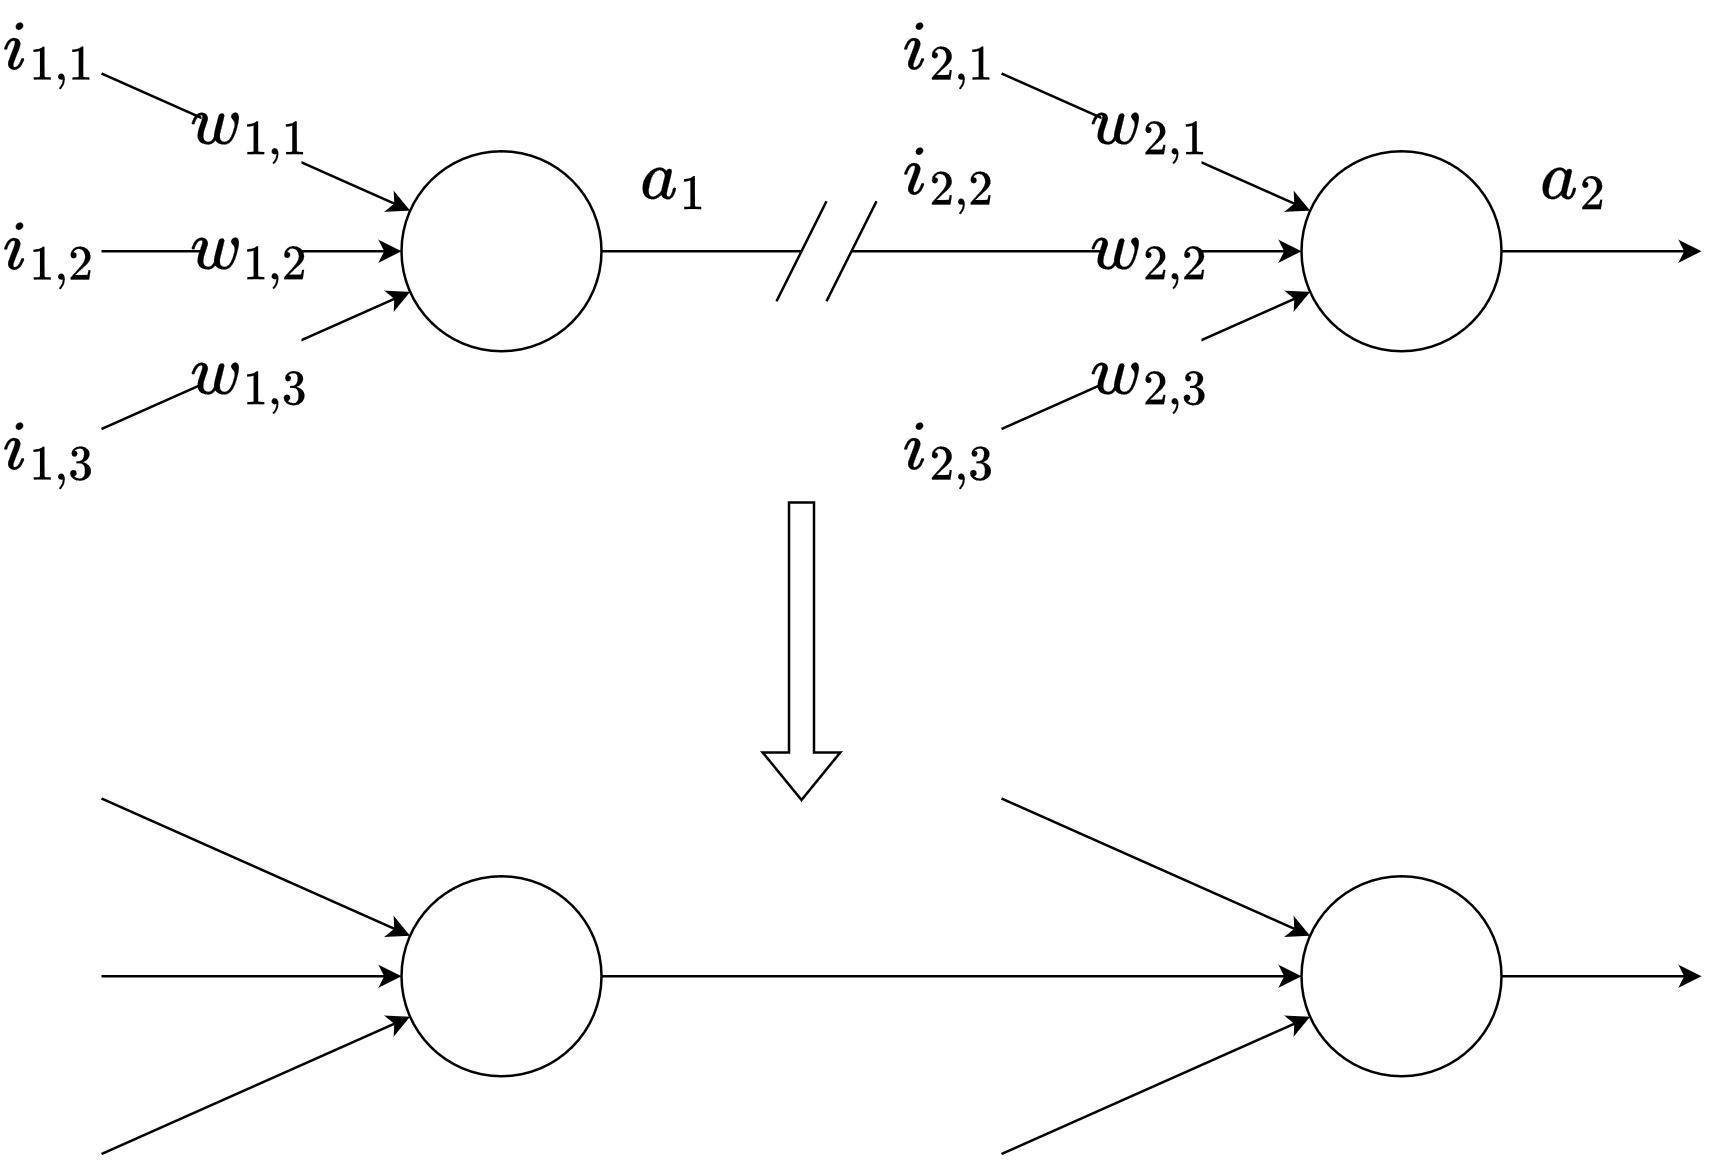

</div>

As shown above, the axon emits an unweighted signal, and the weights are located on the dendrites. We can simplify this visual notation and hide the weights. However, to account for the fact that several dendrites can receive the signal from one single axon, we allow ourselves to represent these different transmissions through multiple arrows, one per dendrite.

<div style="max-width:350px;margin-right: auto; margin-left: auto;">

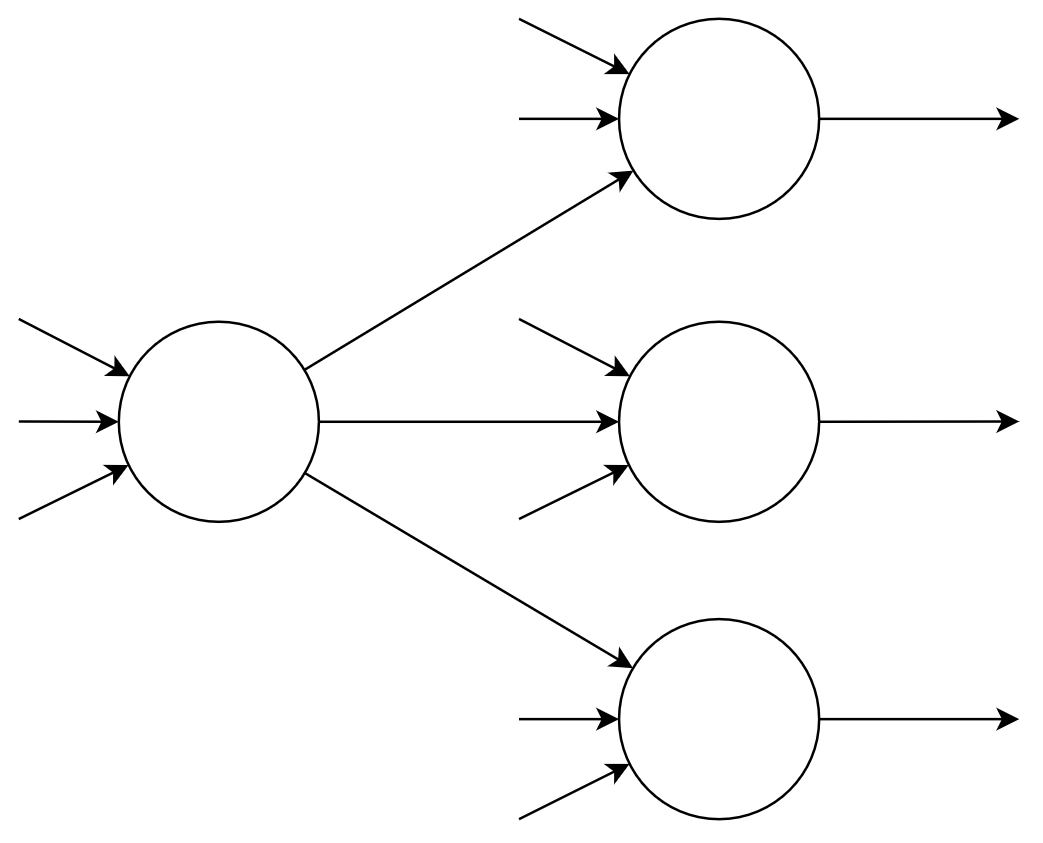

</div>

Once we have connected one neuron to several other neurons, we have the most basic neural network: just several neurons that communicate.
The neurons can be organized in layers.

<div style="max-width:400px;margin-right: auto; margin-left: auto;">

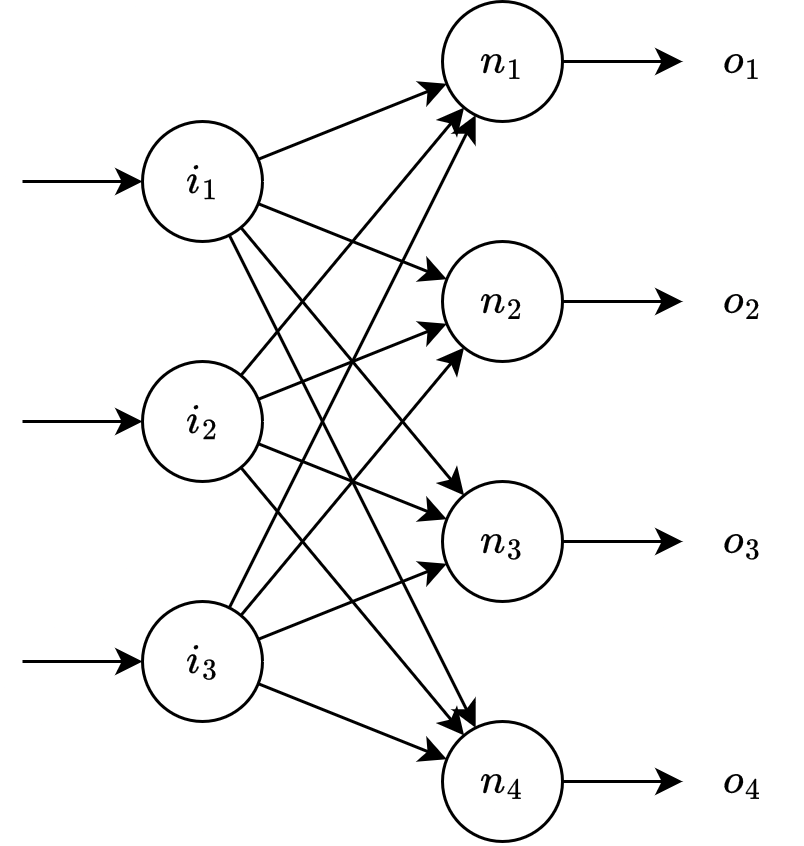

</div>

In this layer, we can see multiple neurons pulling information from input nodes/neurons. It is common that inputs (nodes $i_1$ to $i_3$) are represented as neurons that only transmit information without processing. This doesn't hold for output though (labels $o_1$ to $o_4$).

Now, let $W_{(i)}$ and $\theta_{(i)}$ be the parameters of the neuron $n_i$, $I=\begin{pmatrix}i_1\\\vdots\\ i_n\end{pmatrix}$ and $O=\begin{pmatrix}o_1\\\vdots\\ o_m\end{pmatrix}$.

As said in first part, we have $o_i=H(W_{(i)}^\top I-\theta_{(i)})$. If $H$ now generalizes to vectors by being applied component-wise, we have :
$$\begin{pmatrix}o_1\\\vdots\\ o_m\end{pmatrix}=H\left(\begin{pmatrix}W_{(1)}^\top\\\hline \vdots\\\hline W_{(m)}^\top\end{pmatrix}I-\begin{pmatrix}\theta_{(1)}\\\vdots\\ \theta_{(m)}\end{pmatrix}\right)$$

Let $\widetilde{W}=\left(\begin{array}{c|c|c}& & \\ W_{(1)} & \cdots & W_{(m)}\\ & & \end{array}\right)$ be the matrix containing the weights of the neurons of the layer, and $\widetilde{\theta}=\begin{pmatrix}\theta_{(1)}\\\vdots\\ \theta_{(m)}\end{pmatrix}$ be the vector of all the thresholds. Then we can write, for the layer this time :
$$O=H\left(\widetilde{W}^\top I-\widetilde{\theta}\right)$$

<div style="max-width:500px;margin-right: auto; margin-left: auto;">

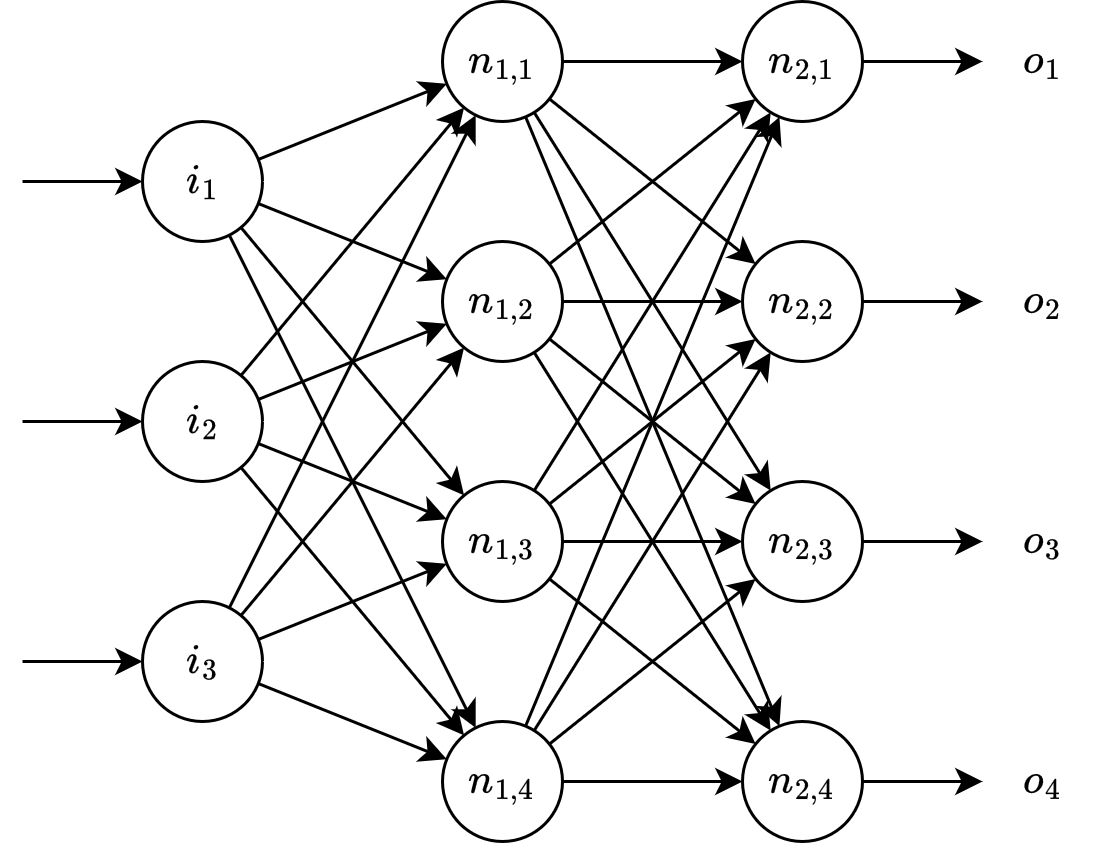

</div>

We can also add another layer, to get:

$$O=H\left(\widetilde{W}_2^\top H\left(\widetilde{W}_1^\top I-\widetilde{\theta}_1\right)-\widetilde{\theta}_2\right)$$

<div style="max-width:600px;margin-right: auto; margin-left: auto;">

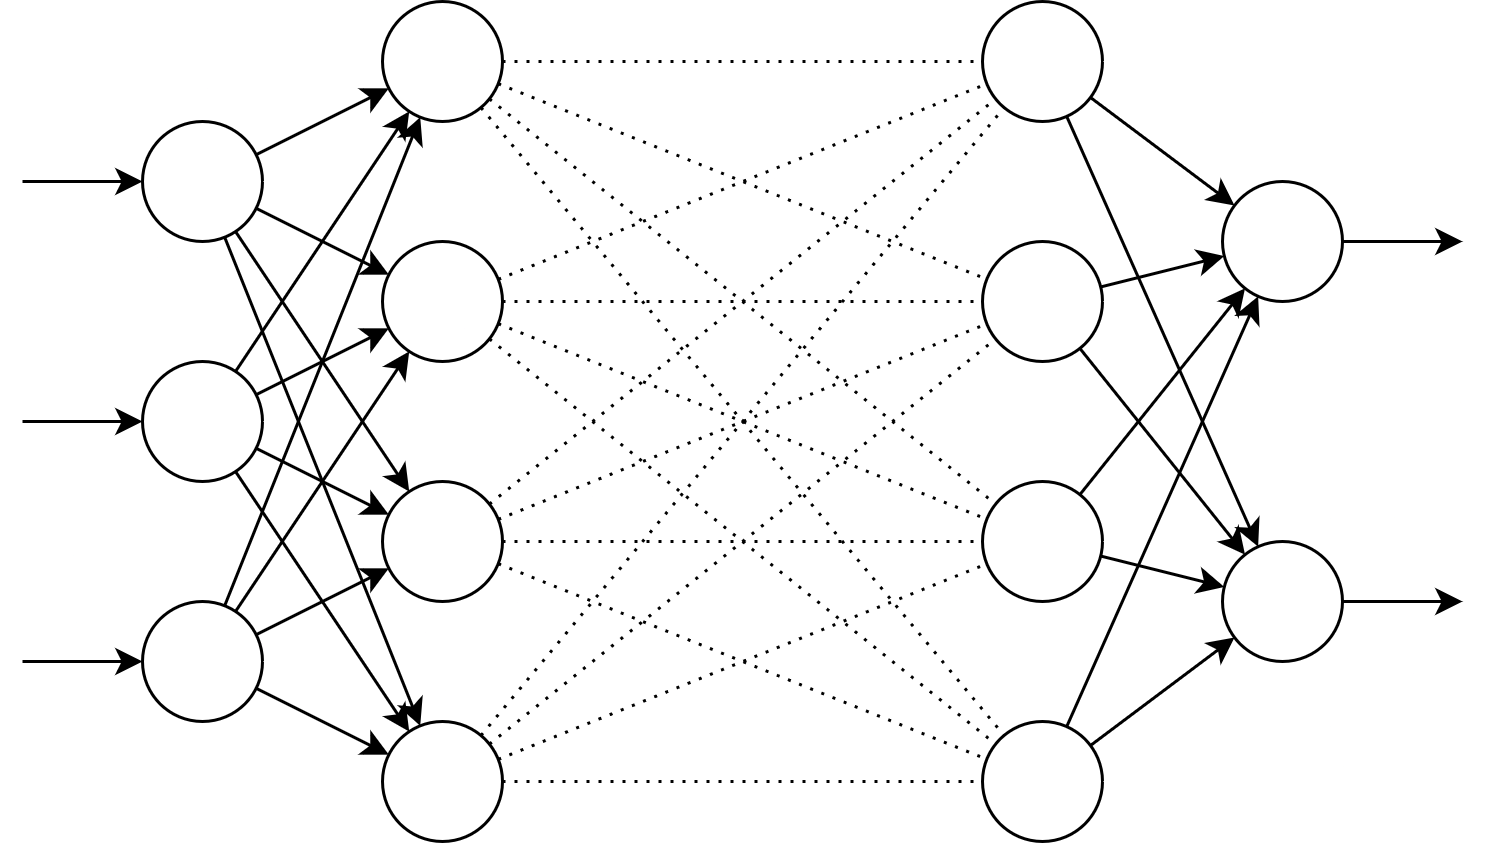

</div>

It is possible to add as many layers as wanted, as shown here by the dashed lines. This is what is called a deep neural network. The output is not the application of only one layer on the input, there are *hidden layers* in between. Indeed, layers can vary in width through the network.

Also, every neuron of one layer is connected to every neuron of the next layer, and this is called a *dense* or *fully-connected* network.

Furthermore, we can notice that in the example here, the information goes only one way, no information is fed back to precedent neurons. Such networks are called feed-forward networks.

On the opposite, networks where loops (of variable length, a neuron can feed back to itself but it can also feed back to a neuron that is several layers before) exist is called a Recurrent Neural Network (RNNs). For the sake of simplicity, RNNs won't be presented in depth before Course 5, although they might be mentionned.

<h3 style="color:skyblue">Generalisation of artificial neurons and layers</h3>

All that has been said previously is a description of neurons that are called Threshold Logic Units (TLUs):
- Threshold because they activate with respect to to a threshold
- Logic because it works only with boolean values (0 or 1)

It is possible to generalize artificial neurons way further. First, we need to separate the two steps of TLU computation:
1. Information aggregation: computing $W^\top I-\theta$
2. Activation: thresholding the aggregated information

Also, remember that $W$ and $\theta$ are parameters that are tied to the neuron. Let $\Theta$ encompass all those weights.

Also, let $s$ be the *activation function* and $f$ the *preactivation function*, we then have in general:
$$a=s(f(I,\Theta))$$

Usually, $f$ is linear (a linear transformation, a convolution) and $s$ is non-linear (sigmoid, ReLU, tanh, step, etc). This is the generalized framework of artificial neurons. The neuron can now work on any input space supported by $f$.

Furthermore, it happens that layers cannot be decomposed as single cells due to interdependence in the preactivation function (e.g. normalization), and that the activation cannot be separated from the preactivation function (e.g. softmax). In this case, we talk about *layer functions*, if relevant *layer activation and preactivation functions*, and the *number of units/neurons* is the dimension of the output of the layer.

Note that there is no consensus on how to break layers into individual neurons when they're not linear units, and that those terms might be used with fluctuations in their meanings.

All that being said, Linear Networks are networks that we already described previously, but working with inputs extended to the real numbers. Those networks are mostly used for regression and classification on unstructured numerical data.

Setting a convolution as the layer function will give Convolutionnal Neural Networks (CNNs). Those networks are mostly useful to process data that can be meaningfully represented as pictures.

Adding feedback loops to a network will provide a way for the network to keep information from one iteration to another, creating a slight effect of memory.

Neural Networks are very flexible, and can be used for a variety of tasks, such as regression (finding a good model for data), classification (putting data into categories), transformation (extracting information, applying filters etc.), prediction (next word prediction, action prediction for agents) etc.